# Regression Model for Ames Iowa Housing Prices Using Python Take 8
### David Lowe
### March 3, 2020

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Ames Iowa Housing Prices dataset is a regression situation where we are trying to predict the value of a continuous variable.

INTRODUCTION: Many factors can influence a home's purchase price. This Ames Housing dataset contains 79 explanatory variables describing every aspect of residential homes in Ames, Iowa. The goal is to predict the final price of each home.

In iteration Take1, we established the baseline mean squared error for further takes of modeling.

In iteration Take2, we converted some of the categorical variables from nominal to ordinal and observed the effects of the change.

In iteration Take3, we examined the feature selection technique of attribute importance ranking by using the Gradient Boosting algorithm. By selecting only the most important attributes, we decreased the processing time and maintained a similar level of RMSE compared to the baseline.

In iteration Take4, we examined the feature selection technique of recursive feature elimination (RFE) by using the Gradient Boosting algorithm. By selecting up to 100 attributes, we decreased the processing time and maintained a similar level of RMSE compared to the baseline.

In iteration Take5, we constructed several Multilayer Perceptron (MLP) models with one, two, and three hidden layers. We also observed how the different model architectures affect the RMSE metric.

In iteration Take6, we added Dropout layers to our Multilayer Perceptron (MLP) models. We also observed how the Dropout layers affect the RMSE metric.

In iteration Take7, we constructed Multilayer Perceptron (MLP) models with batch normalization. We also observed whether the batch normalization technique had a positive effect on the RMSE metric.

In this Take8 iteration, we will construct and tune an eXtreme Gradient Boosting (XGBoost) model in the hope of improving the RMSE metric.

ANALYSIS: In iteration Take1, the baseline performance of the machine learning algorithms achieved an average RMSE of 31,172. Two algorithms (Ridge Regression and Gradient Boosting) achieved the top RMSE metrics after the first round of modeling. After a series of tuning trials, Gradient Boosting turned in the best overall result and achieved an RMSE metric of 24,165. By using the optimized parameters, the Gradient Boosting algorithm processed the test dataset with an RMSE of 21,067, which was even better than the prediction from the training data.

In iteration Take2, Gradient Boosting achieved an RMSE metric of 23,612 with the training dataset and processed the test dataset with an RMSE of 21,130. Converting the nominal variables to ordinal did not have a material impact on the prediction accuracy in either direction.

In iteration Take3, Gradient Boosting achieved an RMSE metric of 24,045 with the training dataset and processed the test dataset with an RMSE of 21,994. At the importance level of 99%, the attribute importance technique eliminated 222 of 258 total attributes. The remaining 36 attributes produced a model that achieved a comparable RMSE to the baseline model. The processing time for Take2 also reduced by 67.90% compared to the Take1 iteration.

In iteration Take4, Gradient Boosting achieved an RMSE metric of 23,825 with the training dataset and processed the test dataset with an RMSE of 21,898. The RFE technique eliminated 208 of 258 total attributes. The remaining 50 attributes produced a model that achieved a comparable RMSE to the baseline model. The processing time for Take3 also reduced by 1.8% compared to the Take1 iteration.

In iteration Take5, all models processed the test dataset and produced an RMSE near or around the 23,000 level. The two-layer model with 128 and 64 nodes (Model 2C) was able to achieve the best RMSE of 22,708 using the test dataset. All models eventually overfit, and the models with more layers overfit much faster than the simpler models.

In iteration Take6, all models again processed the test dataset and produced an RMSE near or around the 23,000 level. All models eventually overfit, but the Dropout layers can help by reducing overfitting.

In iteration Take7, all models processed the test dataset with a much larger variation compared to models that have only Dropout layers. All models eventually overfit, but the Batch Normalization technique did not seem to help in reducing overfitting.

In this Take8 iteration, the tuned eXtreme Gradient Boosting (XGBoost) model achieved an improved MAE metric of 25,625 using the training data. When configured with the optimized parameters, the XGBoost algorithm processed the test dataset with an MAE of 23,327, which was in line with the MAE prediction from the training data.

CONCLUSION: For this iteration, the eXtreme Gradient Boosting algorithm did not achieve a better result when compared to other machine learning techniques. For this dataset, we should consider earlier results and use other machine learning algorithms for further modeling or production uses.

Dataset Used: Kaggle Competition - House Prices: Advanced Regression Techniques

Dataset ML Model: Regression with numerical and categorical attributes

Dataset Reference: https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

One potential source of performance benchmarks: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Environment
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Environment

In [1]:
# Retrieve GPU information
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Wed Feb 26 21:44:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### 1.a) Load libraries and modules

In [0]:
# Set the random seed number for reproducible results
seedNum = 888

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import sys
import shutil
import urllib.request
import zipfile
import smtplib
import re
from datetime import datetime
from email.message import EmailMessage
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

### 1.b) Set up the controlling parameters and functions

In [0]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the number of CPU cores available for multi-thread processing
n_jobs = -1

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set the number of folds for cross validation
n_folds = 5

# Set various default modeling parameters
scoring = 'neg_mean_squared_error'

In [0]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if sender==None or receiver==None or gateway==None or smtpuser==None or password==None:
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from Python Regression Modeling Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [0]:
if (notifyStatus): email_notify("Library and Data Loading has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 1.c) Load dataset

In [7]:
dataset_path = 'https://dainesanalytics.com/datasets/kaggle-ames-iowa-housing-prices/train.csv'
Xy_original = pd.read_csv(dataset_path, sep=',', index_col=0)

# Take a peek at the dataframe after import
Xy_original.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [8]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [9]:
Xy_original.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
Xy_original.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [11]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  6965


### 1.d) Data Cleaning

In [0]:
# Dropping rows as recommended by the original report
Xy_original.query('GrLivArea < 4000', inplace=True)

# Impute the missing values as necessary
Xy_original['LotFrontage'].fillna(0, inplace=True)
Xy_original['Alley'].fillna('NoAlley', inplace=True)
Xy_original.Alley = Xy_original.Alley.astype('category')
Xy_original['MasVnrType'].fillna('NoMasonry', inplace=True)
Xy_original.MasVnrType = Xy_original.MasVnrType.astype('category')
Xy_original['MasVnrArea'].fillna(0, inplace=True)
Xy_original['BsmtQual'].fillna('NA', inplace=True)
Xy_original.BsmtQual = Xy_original.BsmtQual.astype('category')
Xy_original['BsmtCond'].fillna('NA', inplace=True)
Xy_original.BsmtCond = Xy_original.BsmtCond.astype('category')
Xy_original['BsmtExposure'].fillna('NA', inplace=True)
Xy_original.BsmtExposure = Xy_original.BsmtExposure.astype('category')
Xy_original['BsmtFinType1'].fillna('NA', inplace=True)
Xy_original.BsmtFinType1 = Xy_original.BsmtFinType1.astype('category')
Xy_original['BsmtFinType2'].fillna('NA', inplace=True)
Xy_original.BsmtFinType2 = Xy_original.BsmtFinType2.astype('category')
Xy_original['Electrical'].fillna('Unknown', inplace=True)
Xy_original.Electrical = Xy_original.Electrical.astype('category')
Xy_original['FireplaceQu'].fillna('NA', inplace=True)
Xy_original.FireplaceQu = Xy_original.FireplaceQu.astype('category')
Xy_original['GarageType'].fillna('NoGarage', inplace=True)
Xy_original.GarageType = Xy_original.GarageType.astype('category')
Xy_original['GarageYrBlt'].fillna(value=Xy_original['GarageYrBlt'].min(), inplace=True)
Xy_original.GarageYrBlt = Xy_original.GarageYrBlt.astype('category')
Xy_original['GarageFinish'].fillna('NA', inplace=True)
Xy_original.GarageFinish = Xy_original.GarageFinish.astype('category')
Xy_original['GarageQual'].fillna('NA', inplace=True)
Xy_original.GarageQual = Xy_original.GarageQual.astype('category')
Xy_original['GarageCond'].fillna('NA', inplace=True)
Xy_original.GarageCond = Xy_original.GarageCond.astype('category')
Xy_original['PoolQC'].fillna('NA', inplace=True)
Xy_original.PoolQC = Xy_original.PoolQC.astype('category')
Xy_original['Fence'].fillna('NoFence', inplace=True)
Xy_original.Fence = Xy_original.Fence.astype('category')
Xy_original['MiscFeature'].fillna('NoMiscFeature', inplace=True)
Xy_original.MiscFeature = Xy_original.MiscFeature.astype('category')

# Convert features with Y/N levels into category features
Xy_original.MSSubClass = Xy_original.MSSubClass.astype('category')
Xy_original.MSZoning = Xy_original.MSZoning.astype('category')
Xy_original.Street = Xy_original.Street.astype('category')
Xy_original.LotShape = Xy_original.LotShape.astype('category')
Xy_original.LandContour = Xy_original.LandContour.astype('category')
Xy_original.Utilities = Xy_original.Utilities.astype('category')
Xy_original.LotConfig = Xy_original.LotConfig.astype('category')
Xy_original.LandSlope = Xy_original.LandSlope.astype('category')
Xy_original.Neighborhood = Xy_original.Neighborhood.astype('category')
Xy_original.Condition1 = Xy_original.Condition1.astype('category')
Xy_original.Condition2 = Xy_original.Condition2.astype('category')
Xy_original.BldgType = Xy_original.BldgType.astype('category')
Xy_original.HouseStyle = Xy_original.HouseStyle.astype('category')
Xy_original.OverallQual = Xy_original.OverallQual.astype('category')
Xy_original.OverallCond = Xy_original.OverallCond.astype('category')
Xy_original.YearBuilt = Xy_original.YearBuilt.astype('category')
Xy_original.YearBuilt = Xy_original.YearBuilt.astype('category')
Xy_original.YearRemodAdd = Xy_original.YearRemodAdd.astype('category')
Xy_original.RoofStyle = Xy_original.RoofStyle.astype('category')
Xy_original.RoofMatl = Xy_original.RoofMatl.astype('category')
Xy_original.Exterior1st = Xy_original.Exterior1st.astype('category')
Xy_original.Exterior2nd = Xy_original.Exterior2nd.astype('category')
Xy_original.ExterQual = Xy_original.ExterQual.astype('category')
Xy_original.ExterCond = Xy_original.ExterCond.astype('category')
Xy_original.Foundation = Xy_original.Foundation.astype('category')
Xy_original.Heating = Xy_original.Heating.astype('category')
Xy_original.HeatingQC = Xy_original.HeatingQC.astype('category')
Xy_original.CentralAir = Xy_original.CentralAir.astype('category')
Xy_original.BsmtFullBath = Xy_original.BsmtFullBath.astype('category')
Xy_original.BsmtHalfBath = Xy_original.BsmtHalfBath.astype('category')
Xy_original.FullBath = Xy_original.FullBath.astype('category')
Xy_original.HalfBath = Xy_original.HalfBath.astype('category')
Xy_original.BedroomAbvGr = Xy_original.BedroomAbvGr.astype('category')
Xy_original.KitchenAbvGr = Xy_original.KitchenAbvGr.astype('category')
Xy_original.KitchenQual = Xy_original.KitchenQual.astype('category')
Xy_original.TotRmsAbvGrd = Xy_original.TotRmsAbvGrd.astype('category')
Xy_original.Functional = Xy_original.Functional.astype('category')
Xy_original.Fireplaces = Xy_original.Fireplaces.astype('category')
Xy_original.GarageCars = Xy_original.GarageCars.astype('category')
Xy_original.PavedDrive = Xy_original.PavedDrive.astype('category')
Xy_original.MoSold = Xy_original.MoSold.astype('category')
Xy_original.YrSold = Xy_original.YrSold.astype('category')
Xy_original.SaleType = Xy_original.SaleType.astype('category')
Xy_original.SaleCondition = Xy_original.SaleCondition.astype('category')

In [13]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1456 non-null category
MSZoning         1456 non-null category
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null category
Alley            1456 non-null category
LotShape         1456 non-null category
LandContour      1456 non-null category
Utilities        1456 non-null category
LotConfig        1456 non-null category
LandSlope        1456 non-null category
Neighborhood     1456 non-null category
Condition1       1456 non-null category
Condition2       1456 non-null category
BldgType         1456 non-null category
HouseStyle       1456 non-null category
OverallQual      1456 non-null category
OverallCond      1456 non-null category
YearBuilt        1456 non-null category
YearRemodAdd     1456 non-null category
RoofStyle        1456 non-null category
RoofMatl         1456 non-null category
Exterior1st      

In [14]:
Xy_original.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,57.296016,10448.784341,101.526786,436.991071,46.677198,566.990385,1050.658654,1157.108516,343.532967,5.860577,1506.502060,471.568681,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,180151.233516
std,33.877802,9860.763449,177.011773,430.255052,161.522376,442.197182,412.155715,369.307331,431.528915,48.688904,496.815378,211.986421,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,76696.592530
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7538.750000,0.000000,0.000000,0.000000,222.500000,795.000000,882.000000,0.000000,0.000000,1128.000000,329.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,63.000000,9468.500000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,1458.500000,478.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11588.000000,163.250000,706.500000,0.000000,808.000000,1293.750000,1389.250000,728.000000,0.000000,1775.250000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,1818.000000,572.000000,3627.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,625000.000000


In [15]:
Xy_original.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [16]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  0


### 1.e) Splitting Data into Attribute-only and Target-only Sets

In [0]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(Xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [18]:
# We create attribute-only and target-only datasets (X_original and y_original)
# for various visualization and cleaning/transformation operations

if targetCol == totCol:
    X_original = Xy_original.iloc[:,0:totAttr]
    y_original = Xy_original.iloc[:,totAttr]
else:
    X_original = Xy_original.iloc[:,1:totCol]
    y_original = Xy_original.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(Xy_original.shape, X_original.shape, y_original.shape))

Xy_original.shape: (1456, 80) X_original.shape: (1456, 79) y_original.shape: (1456,)


### 1.f) Set up the parameters for data visualization

In [0]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to display the data visualization plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = dispCol*4
fig_size[1] = dispRow*4
plt.rcParams["figure.figsize"] = fig_size

In [0]:
if (notifyStatus): email_notify("Library and Data Loading completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

In [0]:
if (notifyStatus): email_notify("Data Summarization and Visualization has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 2.a) Descriptive Statistics

#### 2.a.i) Peek at the attribute columns

In [22]:
X_original.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NoFence,NoMiscFeature,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NoFence,NoMiscFeature,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NoFence,NoMiscFeature,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NoFence,NoMiscFeature,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NoFence,NoMiscFeature,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NoFence,NoMiscFeature,0,8,2007,WD,Normal
8,60,RL,0.0,10382,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NoFence,Shed,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NoFence,NoMiscFeature,0,4,2008,WD,Abnorml


#### 2.a.ii) Dimensions and attribute types

In [23]:
X_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 1460
Data columns (total 79 columns):
MSSubClass       1456 non-null category
MSZoning         1456 non-null category
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null category
Alley            1456 non-null category
LotShape         1456 non-null category
LandContour      1456 non-null category
Utilities        1456 non-null category
LotConfig        1456 non-null category
LandSlope        1456 non-null category
Neighborhood     1456 non-null category
Condition1       1456 non-null category
Condition2       1456 non-null category
BldgType         1456 non-null category
HouseStyle       1456 non-null category
OverallQual      1456 non-null category
OverallCond      1456 non-null category
YearBuilt        1456 non-null category
YearRemodAdd     1456 non-null category
RoofStyle        1456 non-null category
RoofMatl         1456 non-null category
Exterior1st      

#### 2.a.iii) Statistical summary of the attributes

In [24]:
X_original.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,57.296016,10448.784341,101.526786,436.991071,46.677198,566.990385,1050.658654,1157.108516,343.532967,5.860577,1506.502060,471.568681,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516
std,33.877802,9860.763449,177.011773,430.255052,161.522376,442.197182,412.155715,369.307331,431.528915,48.688904,496.815378,211.986421,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,7538.750000,0.000000,0.000000,0.000000,222.500000,795.000000,882.000000,0.000000,0.000000,1128.000000,329.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,9468.500000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,1458.500000,478.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,11588.000000,163.250000,706.500000,0.000000,808.000000,1293.750000,1389.250000,728.000000,0.000000,1775.250000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,1818.000000,572.000000,3627.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


### 2.b) Data Visualization

##### 2.b.i) Univariate plots to better understand each attribute

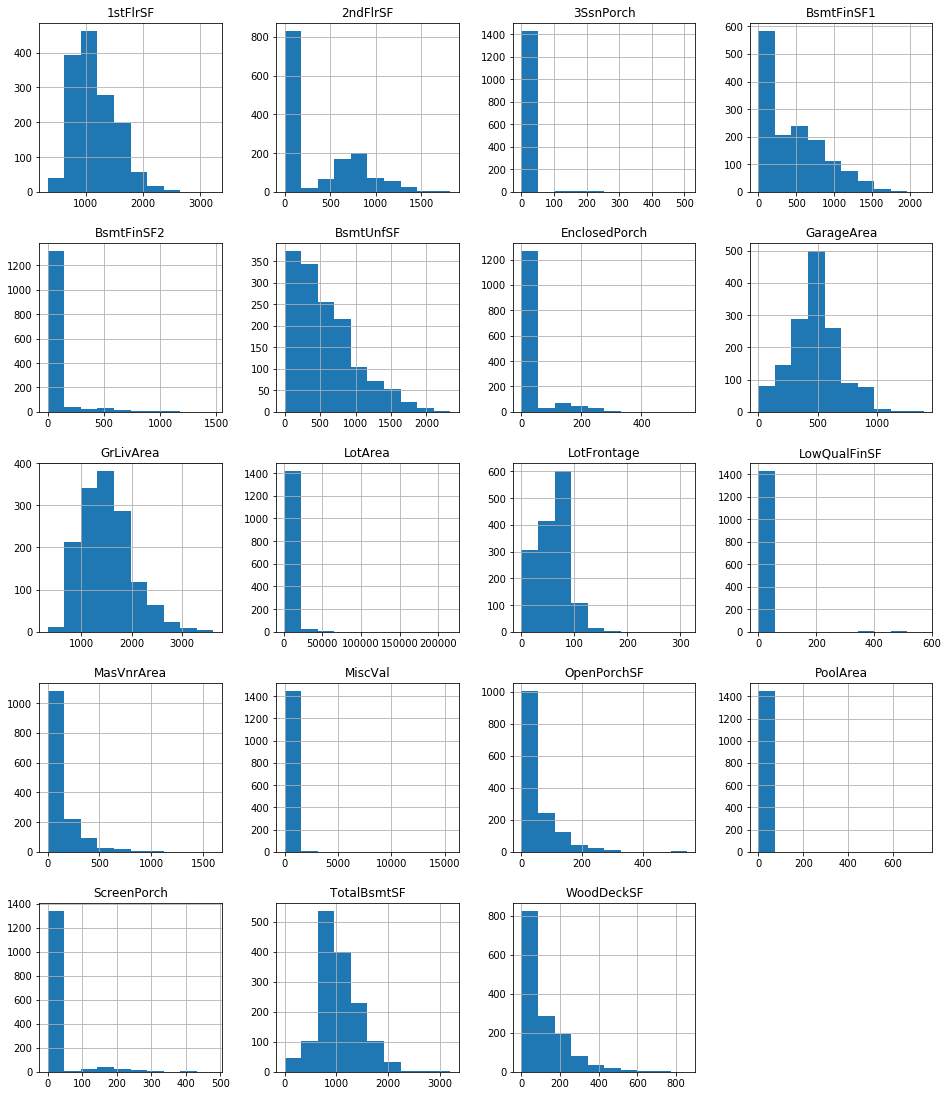

In [25]:
# Histograms for each attribute
X_original.hist(layout=(dispRow,dispCol))
plt.show()

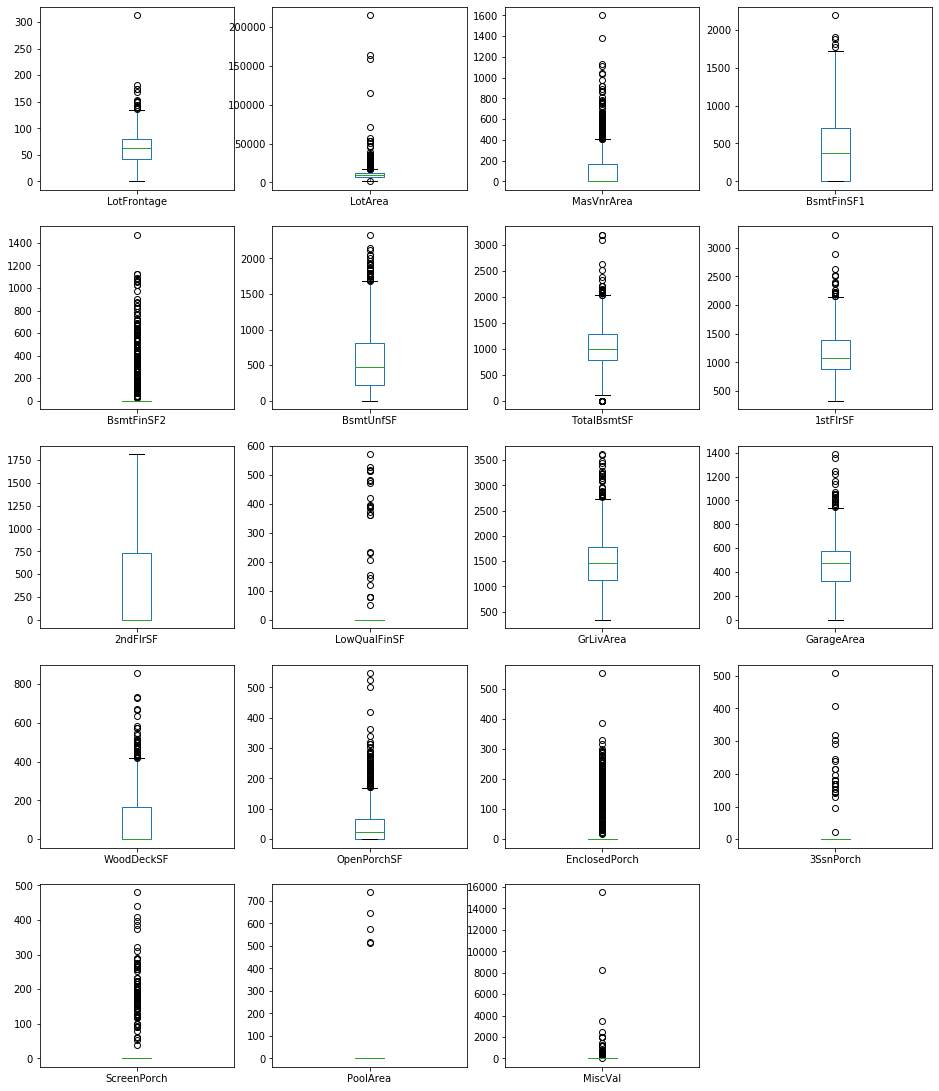

In [26]:
# Box and Whisker plot for each attribute
X_original.plot(kind='box', subplots=True, layout=(dispRow,dispCol))
plt.show()

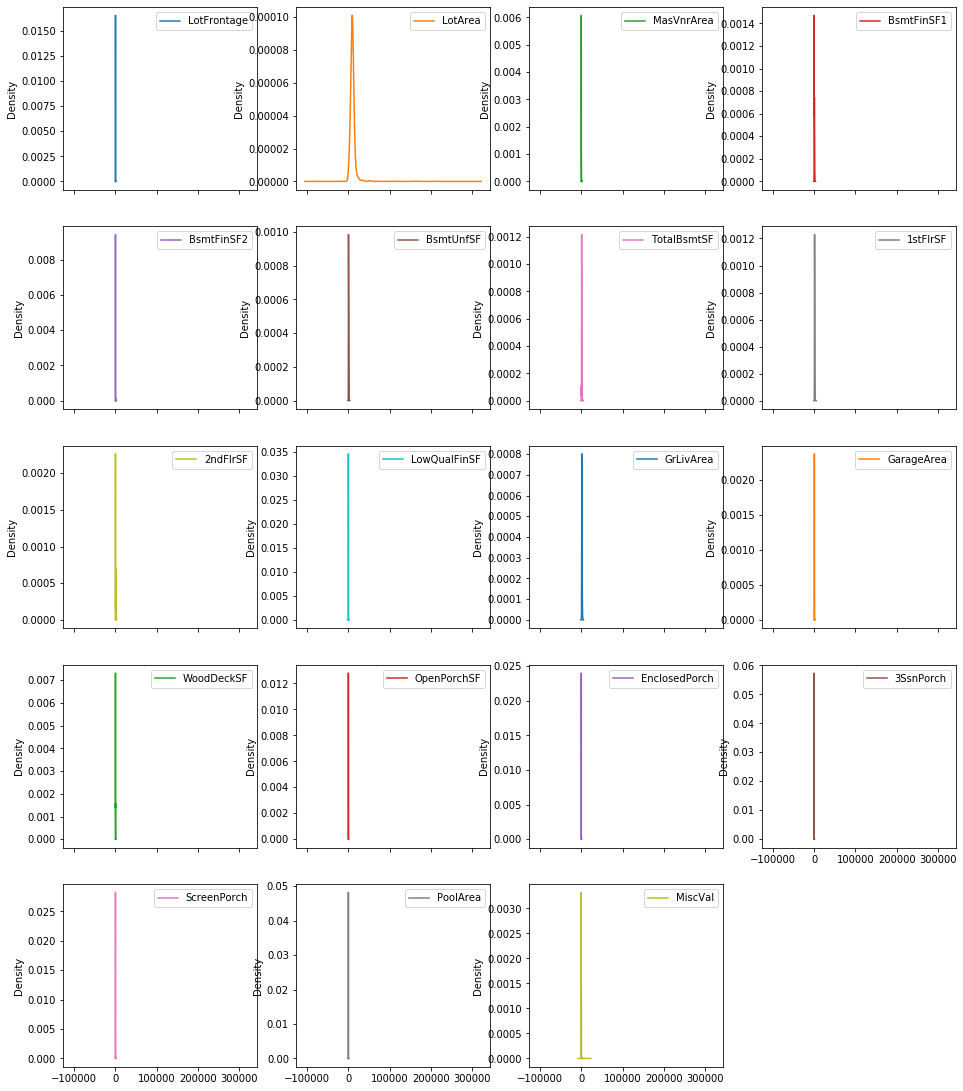

In [27]:
# Density plot for each attribute
X_original.plot(kind='density', subplots=True, layout=(dispRow,dispCol))
plt.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

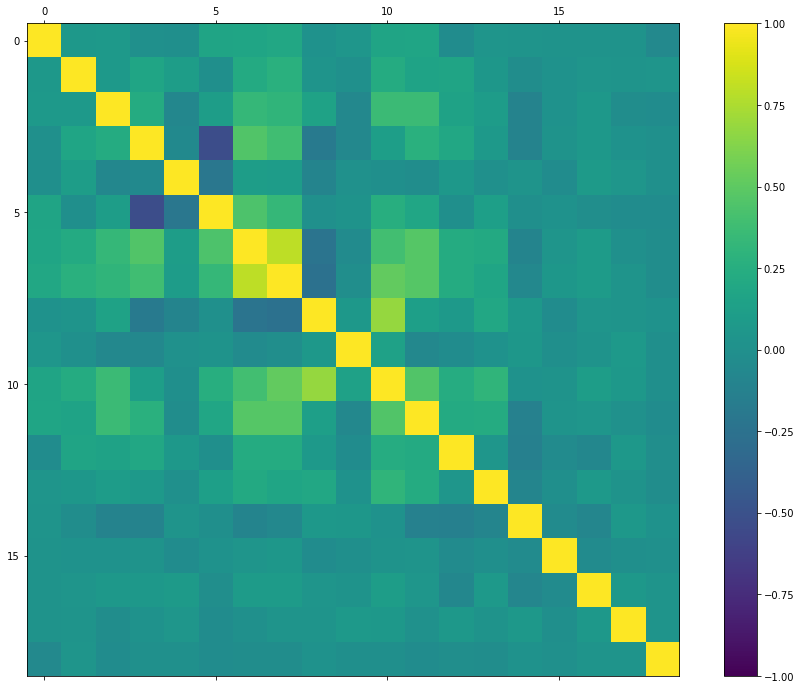

In [28]:
# Correlation matrix
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
correlations = X_original.corr(method='pearson')
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [0]:
if (notifyStatus): email_notify("Data Summarization and Visualization completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

In [0]:
if (notifyStatus): email_notify("Data Cleaning and Transformation has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 3.a) Feature Scaling and Data Pre-Processing

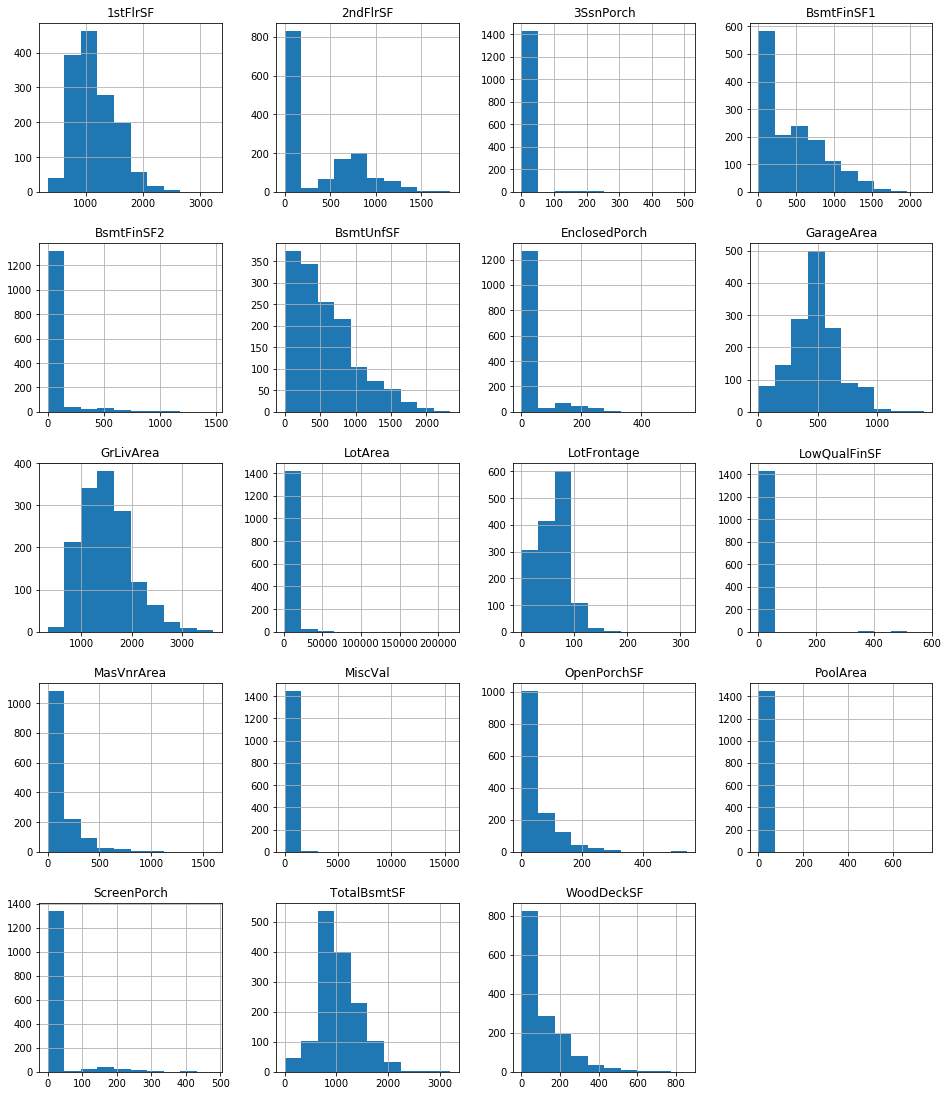

In [31]:
# Histograms for each attribute before pre-processing
X_original.hist(layout=(dispRow,dispCol))
plt.show()

In [32]:
tobe_transformed_cols = []
for col in X_original.columns:
    if(pd.api.types.is_numeric_dtype(X_original[col])):
        tobe_transformed_cols.append(col)
print(tobe_transformed_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [33]:
# Apply feature scaling and transformation
scaler = preprocessing.StandardScaler()
X_original[tobe_transformed_cols] = scaler.fit_transform(X_original[tobe_transformed_cols])
X_original.head(-10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,0.227483,-0.202770,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.533895,Gd,TA,PConc,Gd,TA,No,GLQ,0.625446,Unf,-0.289082,-0.943320,-0.472456,GasA,Ex,Y,SBrkr,-0.815613,1.183333,-0.120409,0.409745,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,0.360672,TA,TA,Y,-0.749775,0.226218,-0.359882,-0.116501,-0.270606,-0.058115,NA,NoFence,NoMiscFeature,-0.087809,2,2008,WD,Normal
2,20,RL,0.670403,-0.086107,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,-0.573757,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.257846,Unf,-0.289082,-0.640184,0.512947,GasA,Ex,Y,SBrkr,0.284120,-0.796357,-0.120409,-0.492308,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,-0.054591,TA,TA,Y,1.631381,-0.707503,-0.359882,-0.116501,-0.270606,-0.058115,NA,NoFence,NoMiscFeature,-0.087809,5,2007,WD,Normal
3,60,RL,0.316067,0.081281,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.341751,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.113946,Unf,-0.289082,-0.300852,-0.317122,GasA,Ex,Y,SBrkr,-0.642256,1.211151,-0.120409,0.562772,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,0.643806,TA,TA,Y,-0.749775,-0.064613,-0.359882,-0.116501,-0.270606,-0.058115,NA,NoFence,NoMiscFeature,-0.087809,9,2008,WD,Normal
4,70,RL,0.079843,-0.091179,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.573757,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.513805,Unf,-0.289082,-0.061058,-0.715166,GasA,Gd,Y,SBrkr,-0.531200,0.956156,-0.120409,0.423840,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,0.804249,TA,TA,Y,-0.749775,-0.171761,4.086653,-0.116501,-0.270606,-0.058115,NA,NoFence,NoMiscFeature,-0.087809,2,2006,WD,Abnorml
5,60,RL,0.788515,0.386636,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.404192,Gd,TA,PConc,Gd,TA,Av,GLQ,0.506871,Unf,-0.289082,-0.174169,0.228976,GasA,Ex,Y,SBrkr,-0.032798,1.644643,-0.120409,1.392339,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,1.719716,TA,TA,Y,0.784392,0.578277,-0.359882,-0.116501,-0.270606,-0.058115,NA,NoFence,NoMiscFeature,-0.087809,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,85,RL,0.375123,-0.207843,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,-0.573757,TA,TA,CBlock,TA,TA,Gd,LwQ,-0.581230,Rec,3.594067,-1.282652,-0.574394,GasA,Gd,Y,SBrkr,-0.661217,-0.796357,-0.120409,-1.195023,1,0,1,0,3,1,TA,6,Typ,0,NA,Detchd,1990.0,Unf,1,-1.092750,TA,TA,Y,-0.749775,-0.707503,3.759702,-0.116501,-0.270606,-0.058115,NA,NoFence,NoMiscFeature,-0.087809,5,2007,WD,Normal
1447,20,RL,-1.691837,1.592028,Pave,NoAl

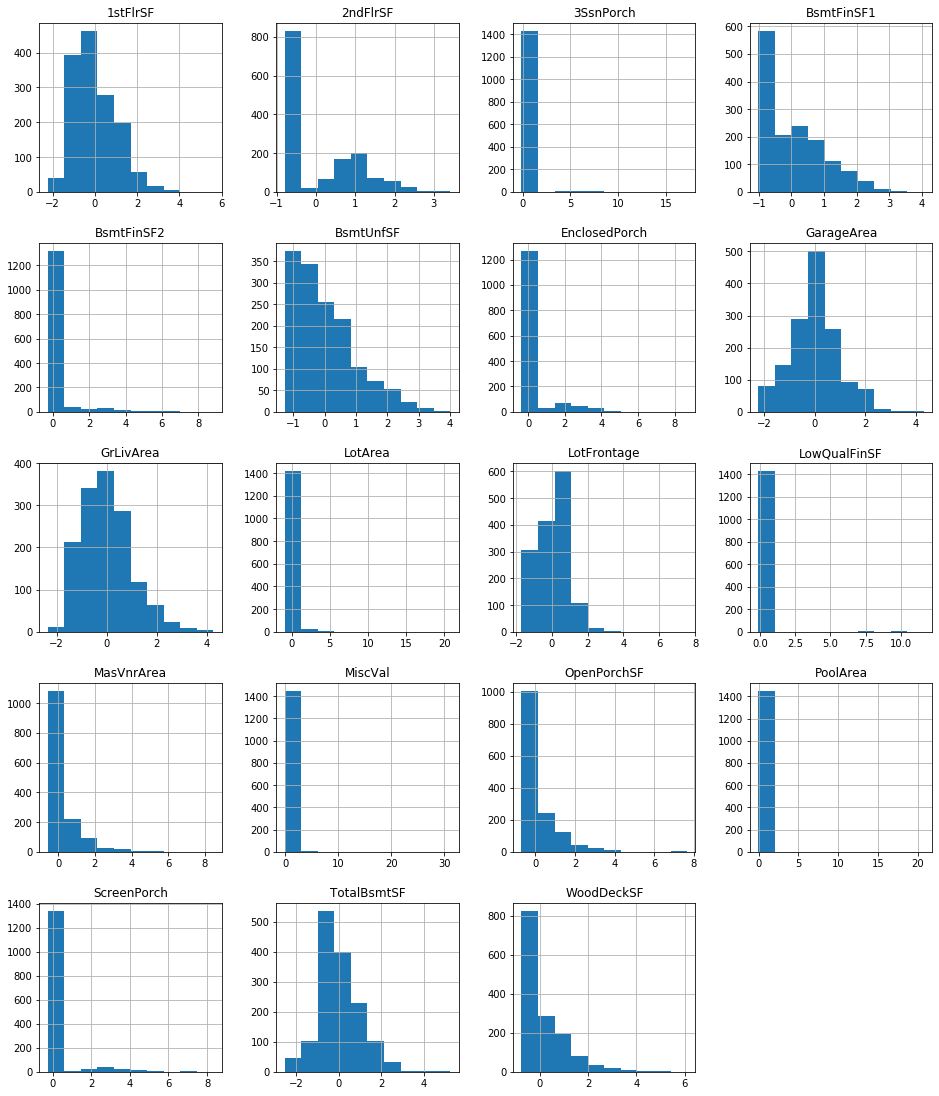

In [34]:
# Histograms for each attribute after pre-processing
X_original.hist(layout=(dispRow,dispCol))
plt.show()

### 3.b) Splitting Data into Training and Test Sets

In [35]:
# Perform one-hot-encoding before splitting into trainig and test
X_original = pd.get_dummies(X_original)
print(X_original.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 1460
Columns: 654 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(19), uint8(635)
memory usage: 1.1 MB
None


In [36]:
X_encoded = X_original.to_numpy()
y_encoded = y_original.to_numpy()
if (splitDataset):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=splitPercentage, random_state=seedNum)
else:
    X_train, y_train = X_encoded, y_encoded
    X_test, y_test = X_encoded, y_encoded
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_test.shape: {} X_test.type: {}".format(X_test.shape, type(X_test)))
print("y_test.shape: {} y_test.type: {}".format(y_test.shape, type(y_test)))

X_train.shape: (1092, 654) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (1092,) y_train.type: <class 'numpy.ndarray'>
X_test.shape: (364, 654) X_test.type: <class 'numpy.ndarray'>
y_test.shape: (364,) y_test.type: <class 'numpy.ndarray'>


### 3.c) Training Data Balancing

In [0]:
# Not applicable for this iteration of the project

### 3.d) Feature Selection

In [0]:
# Not applicable for this iteration of the project

In [0]:
if (notifyStatus): email_notify("Data Cleaning and Transformation completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate four linear, two non-linear, and four ensemble algorithms:

Linear Algorithms: Linear Regression, Ridge Regression, LASSO Regression, and Elastic Net Regression

Non-Linear Algorithms: Decision Trees (CART) and k-Nearest Neighbors

Ensemble Algorithms: Random Forest, Extra Trees, and Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [0]:
# Set up Algorithms Spot-Checking Array
startTimeModule = datetime.now()
train_models = []
train_results = []
train_model_names = []
train_metrics = []
train_models.append(('XGB', XGBRegressor(random_state=seedNum, n_jobs=n_jobs, objective='reg:squarederror', tree_method='gpu_hist')))

In [41]:
# Generate model in turn
for name, model in train_models:
	if (notifyStatus): email_notify("Algorithm "+name+" modeling has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=n_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	train_results.append(cv_results)
	train_model_names.append(name)
	train_metrics.append(cv_results.mean())
	print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
	print(model)
	print ('Model training time:', (datetime.now() - startTimeModule), '\n')
	if (notifyStatus): email_notify("Algorithm "+name+" modeling completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))
print ('Average metrics ('+scoring+') from all models:',np.mean(train_metrics))
print ('Average RMSE for all models is:', math.sqrt((np.mean(train_metrics)*-1)))
print ('Total training time for all models:',(datetime.now() - startTimeModule))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: -732745108.833848 (86088824.835633)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=888, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)
Model training time: 0:00:01.953655 

Average metrics (neg_mean_squared_error) from all models: -732745108.8338476
Average RMSE for all models is: 27069.265022047563
Total training time for all models: 0:00:01.954655


### 4.b) Spot-checking baseline algorithms

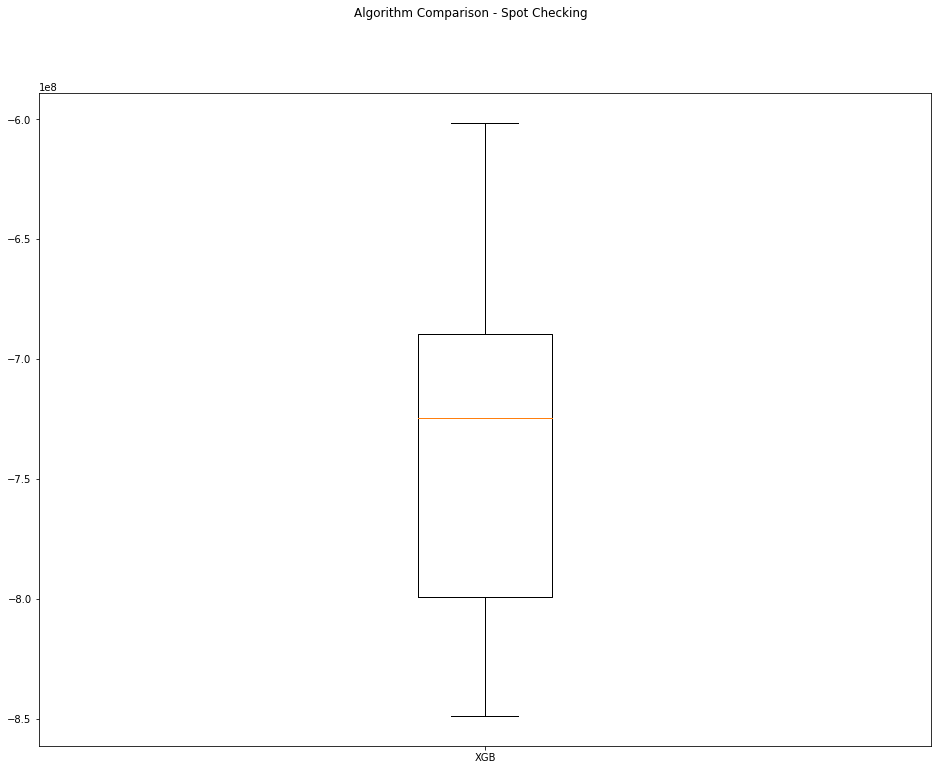

In [42]:
fig = plt.figure(figsize=(16,12))
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(train_model_names)
plt.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

In [0]:
# Set up the comparison array
tune_results = []
tune_model_names = []

In [44]:
# Tuning algorithm #1 - XGBoost
startTimeModule = datetime.now()
if (notifyStatus): email_notify("Algorithm #1 tuning has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

tune_model1 = XGBRegressor(random_state=seedNum, n_jobs=n_jobs, objective='reg:squarederror', tree_method='gpu_hist')
paramGrid1 = dict(max_depth=np.array([3, 6, 9]), min_child_weight=np.array([1, 3, 5]), 
                  learning_rate=np.array([0.005, 0.1, 0.2]), n_estimators=np.array([250, 500, 1000]))
tune_model_names.append('XGB')

kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seedNum)
grid1 = GridSearchCV(estimator=tune_model1, param_grid=paramGrid1, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=1)
grid_result1 = grid1.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
tune_results.append(grid_result1.cv_results_['mean_test_score'])
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Best RMSE for the Model is:', math.sqrt((grid_result1.best_score_*-1)))
print ('Model training time:',(datetime.now() - startTimeModule))
if (notifyStatus): email_notify("Algorithm #1 tuning completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 26.7min finished


Best: -656691029.000221 using {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500}
-4587085385.130760 (546599737.093959) with: {'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 250}
-1322419920.530274 (308362383.543626) with: {'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500}
-790436442.857009 (212037592.174821) with: {'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000}
-4585092319.549196 (540139010.674062) with: {'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 250}
-1305402095.342509 (307623330.989570) with: {'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500}
-776362917.921228 (212823024.158812) with: {'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1000}
-4589481460.736559 (547924219.303421) with: {'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 5, 'n_es

In [45]:
for key, value in grid_result1.best_params_.items():
    best_paramKey1, best_paramValue1 = key, value
    print("Captured the best parameter for algorithm #1:", best_paramKey1, '=', best_paramValue1)

Captured the best parameter for algorithm #1: learning_rate = 0.1
Captured the best parameter for algorithm #1: max_depth = 3
Captured the best parameter for algorithm #1: min_child_weight = 5
Captured the best parameter for algorithm #1: n_estimators = 500


## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

In [0]:
if (notifyStatus): email_notify("Model Validation and Final Model Creation has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 6.a) Measure predictions from the test dataset

In [47]:
test_model1 = XGBRegressor(random_state=seedNum, n_jobs=n_jobs, objective='reg:squarederror', tree_method='gpu_hist',
                           learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 500)
test_model1.fit(X_train, y_train)
predictions1 = test_model1.predict(X_test)
print('RMSE for the model is: ', math.sqrt(mean_squared_error(y_test, predictions1)))
print('R2 for the model is: ', r2_score(y_test, predictions1))
print(test_model1)

RMSE for the model is:  23327.99244957237
R2 for the model is:  0.9090071730652288
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=888, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)


### 6.b) Create a standalone model using all available data

In [0]:
# Combining the training and testing datasets to form the complete dataset that will be used for training the final model
# X_complete = np.vstack((X_train, X_test))
# y_complete = np.concatenate((y_train, y_test))
# print("X_complete.shape: {} y_complete.shape: {}".format(X_complete.shape, y_complete.shape))
# finalModel = test_model1.fit(X_complete, y_complete)
# print(finalModel)

### 6.c) Save the final model for later use

In [0]:
# modelName = 'finalModel_Regression.sav'
# dump(finalModel, modelName)

In [0]:
if (notifyStatus): email_notify("Model Validation and Final Model Creation completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [51]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:27:07.421774
